# パラメータのチューニング

ここでいくつかの概念を飛ばしているが、

ネットより情報を漁ってみてください：

- 混同行列

- ROC曲線とAUC面積

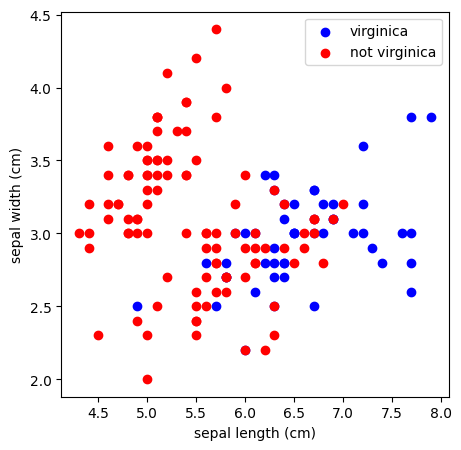

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  

# あやめのデータを利用する
iris = load_iris()

# 特徴量は、sepal width(がく片幅),sepal length(がく片長)のみを使用する
features = [0,1]
# 予測結果は、virginicaかそうでないかだけ考慮する
target = 2 # virginica = 2
X = iris.data[:,features]
y = iris.target
# y = 2ではない(virginicaではない)場合は-1
y[np.where(np.not_equal(y,target))] = -1
y[np.where(np.equal(y,target))] = 1
# データのみ描画
plt.figure(0,figsize=(5,5))
plt.scatter(X[:, 0][np.where(y==1)], X[:, 1][np.where(y==1)], color='b',label=iris.target_names[target])
plt.scatter(X[:, 0][np.where(y==-1)], X[:, 1][np.where(y==-1)], color='r',label=f"not {iris.target_names[target]}")
plt.xlabel(iris.feature_names[features[0]])
plt.ylabel(iris.feature_names[features[1]])
plt.legend()
plt.show()
plt.clf()

sklearnのiris(あやめ)データをそのまま利用します。

萼片のサイズごとの、virginicaに対する判定の分布は上記の図で示しています。

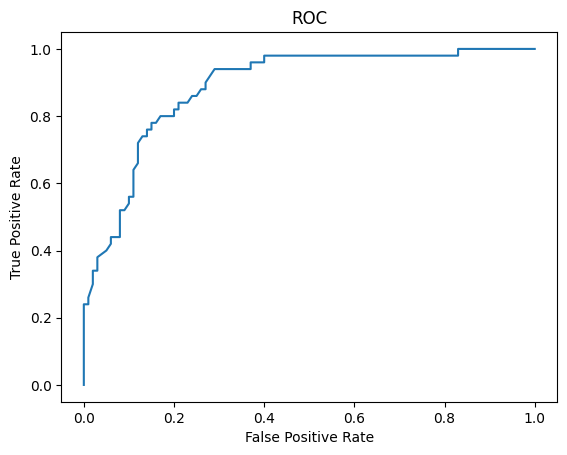

In [2]:
# SVM (C=0.01)
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(X, y)

# ROC曲線
fpr,tpr,th = metrics.roc_curve(y,clf.decision_function(X))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

FPR = 0.18 TPR = 0.8
FPR = 0.2 TPR = 0.8


<Figure size 640x480 with 0 Axes>

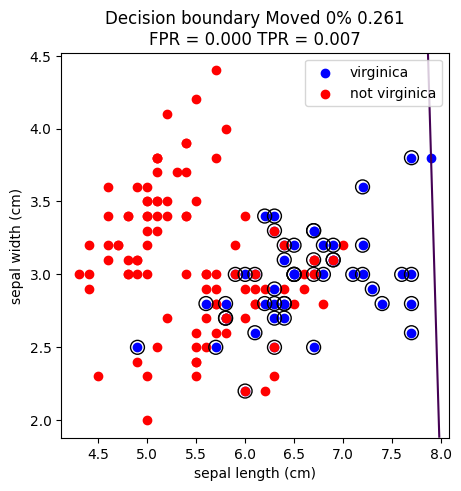

<Figure size 640x480 with 0 Axes>

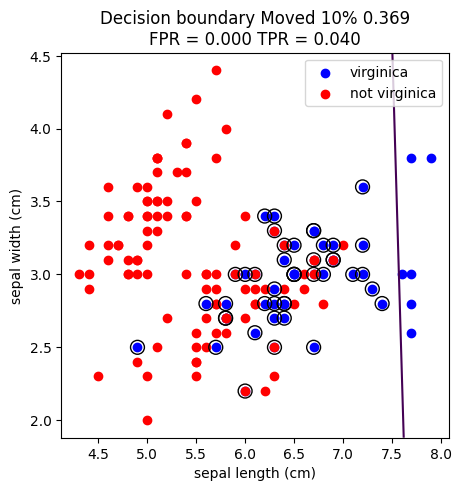

<Figure size 640x480 with 0 Axes>

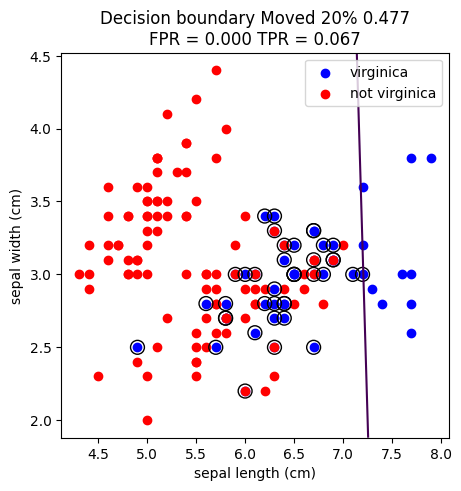

<Figure size 640x480 with 0 Axes>

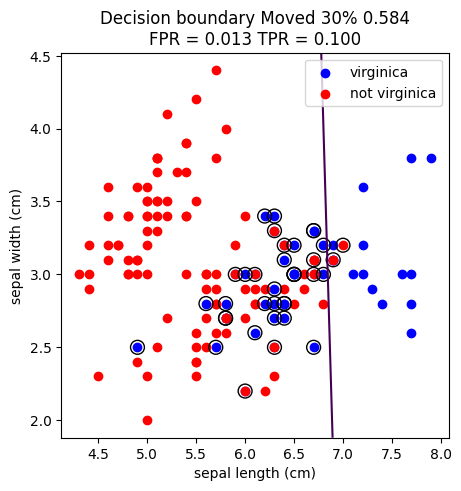

<Figure size 640x480 with 0 Axes>

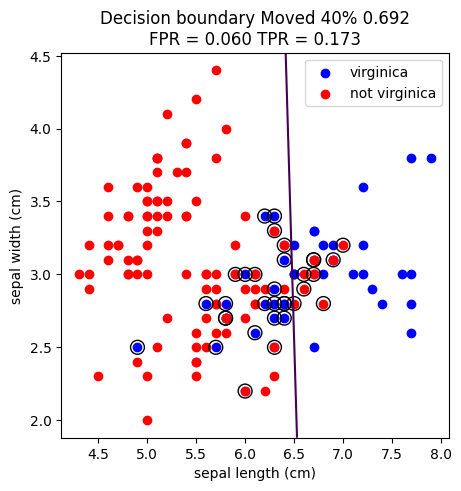

<Figure size 640x480 with 0 Axes>

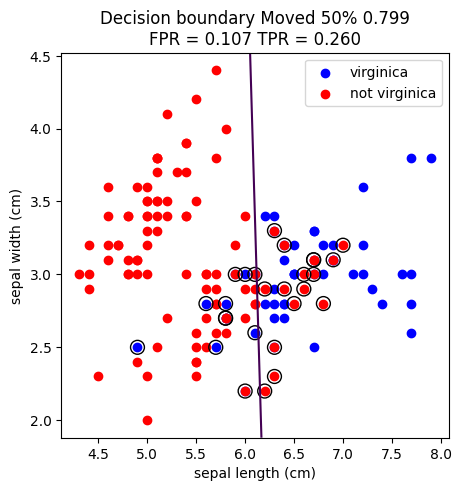

<Figure size 640x480 with 0 Axes>

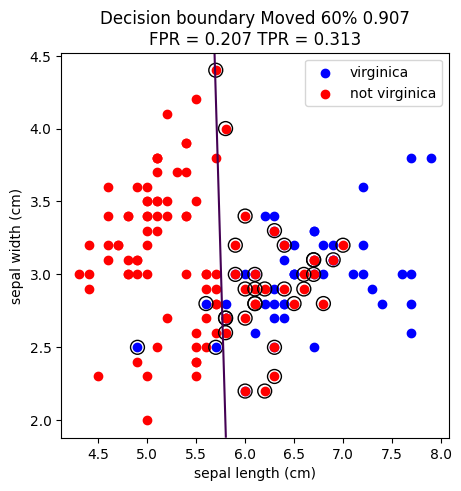

<Figure size 640x480 with 0 Axes>

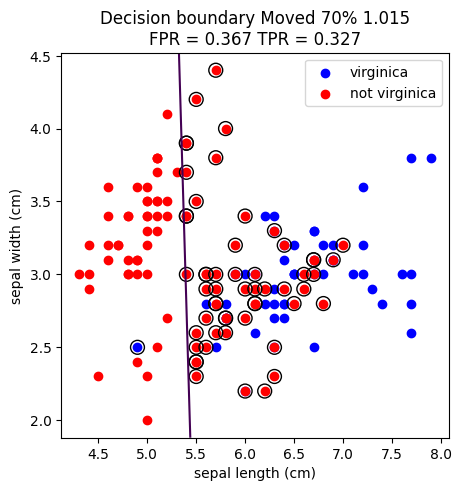

<Figure size 640x480 with 0 Axes>

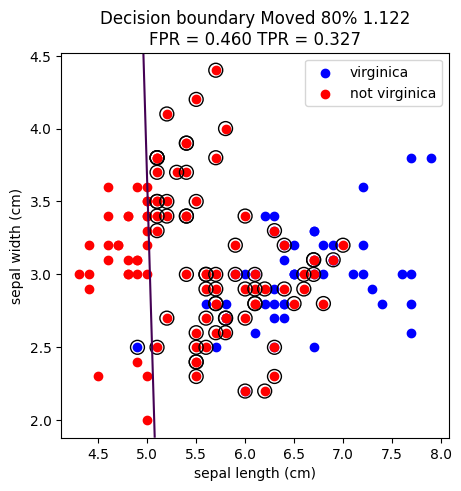

<Figure size 640x480 with 0 Axes>

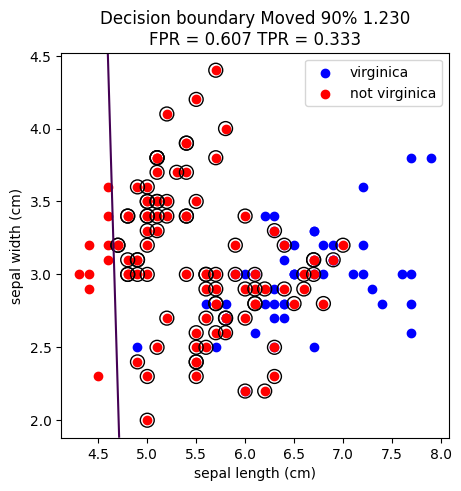

<Figure size 640x480 with 0 Axes>

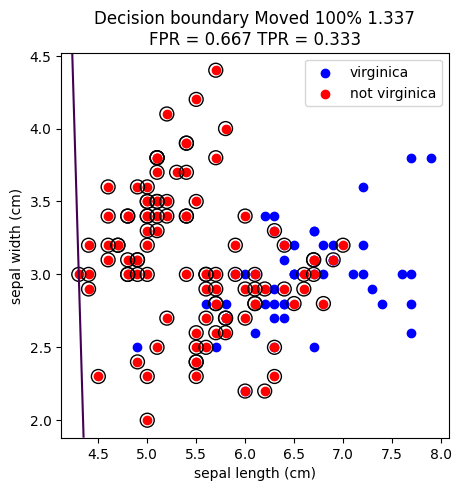

<Figure size 640x480 with 0 Axes>

In [3]:
#False Positive Rateが0.2付近でのTrue Positive Rate
index = np.where(fpr>=0.2)[0].tolist()[0]
print(f"FPR = {fpr[index-1]} TPR = {tpr[index-1]}")
print(f"FPR = {fpr[index]} TPR = {tpr[index]}")

# 切片を変えながら描画
for i in range(0,110,10):
    dec = clf.decision_function(X)
    # 切片を最大値から最小値まで動かす
    intercept = np.max(dec) - i/100*(np.max(dec)-np.min(dec))
    # TPRとFPR
    TP = np.where((np.signbit(dec-intercept)==False) & (np.signbit(y)==False))
    FP = np.where((np.signbit(dec-intercept)==False) & (np.signbit(y)==True))
    FPR = len(FP[0])/len(y)
    TPR = len(TP[0])/len(y)
    # 予測を間違ったもののindex
    index = np.where(np.signbit(dec-intercept)!=np.signbit(y))
    x_miss = X[index]
    y_miss = y[index]
    #描画
    plt.clf()
    plt.figure(0,figsize=(5,5))
    plt.scatter(X[:, 0][np.where(y==1)], X[:, 1][np.where(y==1)], color='b',label=iris.target_names[target])
    plt.scatter(X[:, 0][np.where(y==-1)], X[:, 1][np.where(y==-1)], color='r',label=f"not {iris.target_names[target]}")
    plt.xlabel(iris.feature_names[features[0]])
    plt.ylabel(iris.feature_names[features[1]])
    plt.title(f"Decision boundary Moved {i}% {-intercept:.3f}\nFPR = {FPR:.3f} TPR = {TPR:.3f}")
    # 決定境界の描画
    xlim = plt.xlim()
    ylim = plt.ylim()
    # 30x30の格子を作る
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    # 各格子での分類
    Z = clf.decision_function(xy).reshape(XX.shape)-intercept
    # 等高線を使って決定境界を描画 level=0がそれにあたる
    plt.contour(XX,YY,Z,levels=[0])
    plt.scatter(x_miss[:,0][np.where(y_miss==1)],x_miss[:,1][np.where(y_miss==1)],color='b',s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.scatter(x_miss[:,0][np.where(y_miss==-1)],x_miss[:,1][np.where(y_miss==-1)],color='b',s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.legend()
    plt.show()
    plt.clf()

切片(閾値)を動かしながら行っていたが、このプログラムでは切片を10%動かすごとに描画してみます。

閾値を高くすれば精度は高くなる。つまりvirginicaじゃないものをvirginicaにすることはないが、virginicaをvirginicaではないとしてしまう場合が増える。

逆に閾値を低くすれば、virginicaを正しくvirginicaと判定できるが、virginicaじゃないものもvirginicaになってしまう。

120 30 96 24
Best value of parameter C c_values[3]


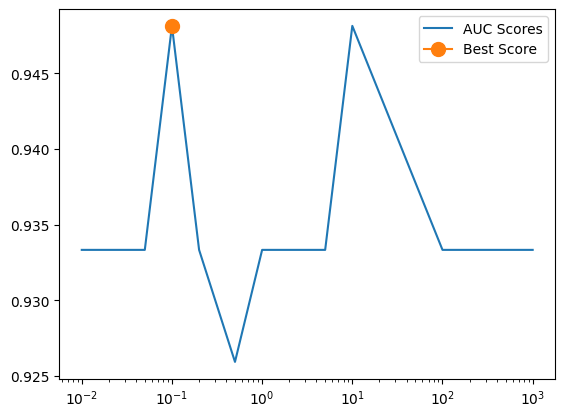

<Figure size 640x480 with 0 Axes>

In [4]:
# Cを0.01から1,000まで変えた時のAUCスコア
c_values = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,100,1000]
aucs = []
# TRAIN/VALICATION/TEST用に3分割
X_tr_val,X_test,y_tr_val,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_tr,X_val,y_tr,y_val = train_test_split(X_tr_val,y_tr_val,test_size=0.2,random_state=1)
print(len(X_tr_val),len(X_test),len(X_tr),len(X_val))
for c_value in c_values:
    clf = svm.SVC(kernel='linear',C=c_value).fit(X_tr,y_tr)
    dec = clf.decision_function(X_val)
    auc = metrics.roc_auc_score(y_val,dec)
    aucs.append(auc)

# 最も良かったCで再計算
best_c_index = np.argmax(aucs)
best_clf = svm.SVC(kernel='linear', C=c_values[best_c_index]).fit(X_tr_val,y_tr_val)
test_predict = best_clf.predict(X_test)
print(f"Best value of parameter C c_values[{best_c_index}]")

plt.clf()
plt.plot(c_values,aucs,label="AUC Scores")
plt.plot(c_values[best_c_index],aucs[best_c_index],marker ='o',markersize=10,label="Best Score")
plt.legend()
plt.xscale("log")
plt.show()
plt.clf()